In [1]:
import pandas as pd
import numpy as np
from datetime import datetime , timedelta 
import yfinance as yf  #import data via Yahoo
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def getYahooData(symbol, start = '2000-01-01' ):
    """
    Get a pandas dataframe using a yahoo symbol from start date until yesterday as a business day.
    args:
        symbol - str
        start - str in YYYY-MM-DD format
        
    return:
        pd.DataFrame
    """
    today = datetime.today()
    # dd/mm/YY
    #get last business day
    offset = max(1, (today.weekday() + 6) % 7 - 3)
    timed = timedelta(offset)
    today_business = today - timed
    print("d1 =", today_business)
    today = today_business.strftime("%Y-%m-%d")
    symbols_list = [symbol]
    start = '2000-01-01' 
    end = today
    print('{symbol} is Downloading'.format(symbol=symbol))
    r = yf.download(symbols_list, start,end)
    df_pivot = r
    
    return df_pivot

In [3]:
SPY = getYahooData('SPY')
TNX = getYahooData('^TNX')
spy_log_rets = np.log(SPY['Adj Close']/SPY['Adj Close'].shift(1)).dropna()
tnx_log_rets = np.log(TNX['Adj Close']/TNX['Adj Close'].shift(1)).dropna() 

d1 = 2022-03-18 16:57:11.163634
SPY is Downloading
[*********************100%***********************]  1 of 1 completed
d1 = 2022-03-18 16:57:11.501379
^TNX is Downloading
[*********************100%***********************]  1 of 1 completed


In [4]:
gmm_data = pd.DataFrame({"Inflation": tnx_log_rets, "SP500": spy_log_rets})
gmm_data.head()

,Inflation,SP500
Date,,
2000-01-03,0.017408,-0.009836
2000-01-04,-0.009668,-0.039892
2000-01-05,0.017426,0.001788
2000-01-06,-0.007606,-0.016202
2000-01-07,-0.006895,0.056453


In [5]:
gmm_data = gmm_data.dropna()
gmm_data=gmm_data.to_numpy()

In [6]:
clf = GaussianMixture(n_components=3, covariance_type="full")
clf.fit(gmm_data)

GaussianMixture(n_components=3)

In [7]:
# display predicted scores by the model as a contour plot
x = np.linspace(-0.5,0.5, 1000)
y = np.linspace(-0.5,0.5, 1000)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

/tmp/ipykernel_7569/3579206126.py:2: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(


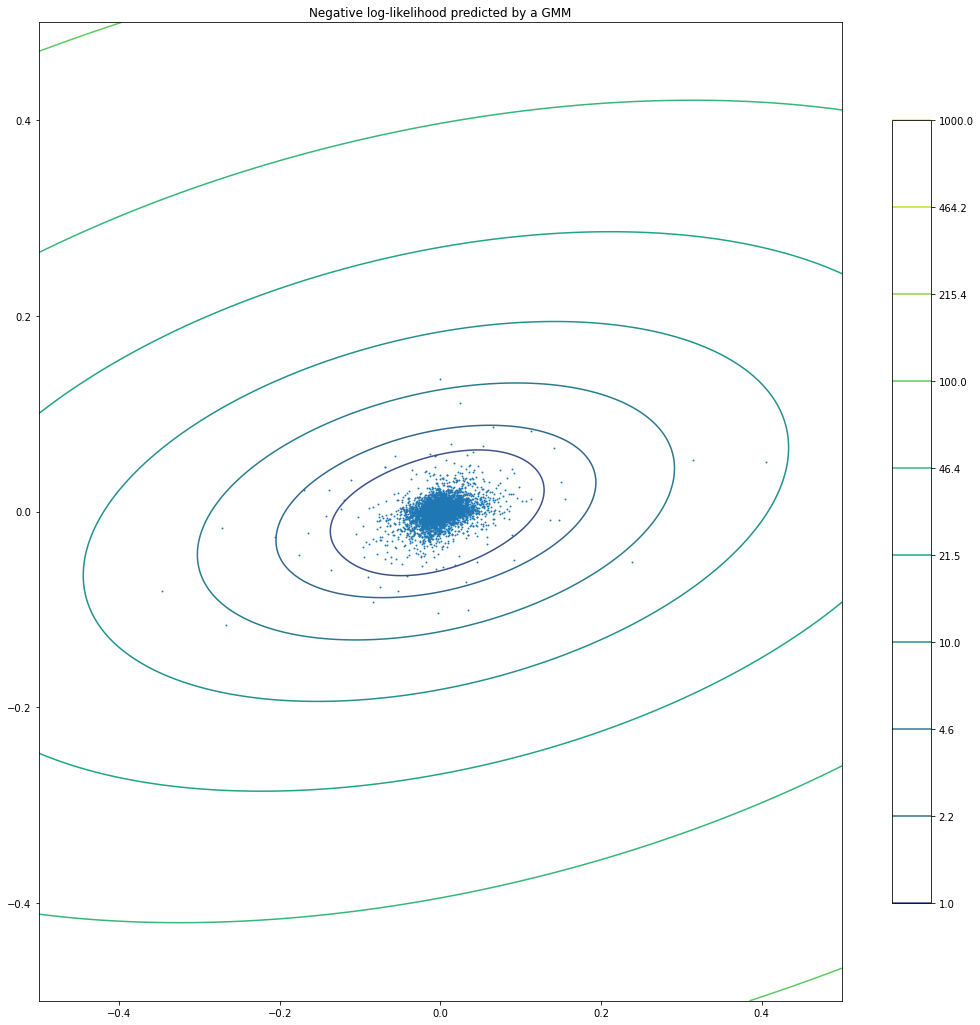

In [8]:
plt.figure(figsize=(18,18))
CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=0.10, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(gmm_data[:, 0], gmm_data[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.savefig("FinalGMM.png")
plt.show()


Monthly Results

In [9]:
SPY = getYahooData('SPY')
TNX = getYahooData('^TNX')
spy_log_rets = np.log(SPY['Adj Close']/SPY['Adj Close'].shift(1)).dropna()
tnx_log_rets = np.log(TNX['Adj Close']/TNX['Adj Close'].shift(1)).dropna() 

d1 = 2022-03-18 16:57:12.359662
SPY is Downloading
[*********************100%***********************]  1 of 1 completed
d1 = 2022-03-18 16:57:12.570308
^TNX is Downloading
[*********************100%***********************]  1 of 1 completed


In [10]:
SPY_monthly=SPY.resample("M").last()
TNX_monthly=TNX.resample("M").last()

In [11]:
spy_monthly_log_rets = np.log(SPY_monthly['Adj Close']/SPY_monthly['Adj Close'].shift(1)).dropna()
tnx_monthly_log_rets = np.log(TNX_monthly['Adj Close']/TNX_monthly['Adj Close'].shift(1)).dropna() 

In [12]:
gmm_data = pd.DataFrame({"Inflation": tnx_monthly_log_rets, "SP500": spy_monthly_log_rets})
gmm_data.head()

,Inflation,SP500
Date,,
2000-01-31,0.035418,-0.051069
2000-02-29,-0.039467,-0.015344
2000-03-31,-0.062118,0.092502
2000-04-30,0.031219,-0.035752
2000-05-31,0.011361,-0.015847


In [13]:
gmm_data = gmm_data.dropna()
gmm_data=gmm_data.to_numpy()
clf = GaussianMixture(n_components=3, covariance_type="full")
clf.fit(gmm_data)
# display predicted scores by the model as a contour plot
x = np.linspace(-0.5,0.5, 1000)
y = np.linspace(-0.5,0.5, 1000)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

/tmp/ipykernel_7569/867888896.py:2: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(


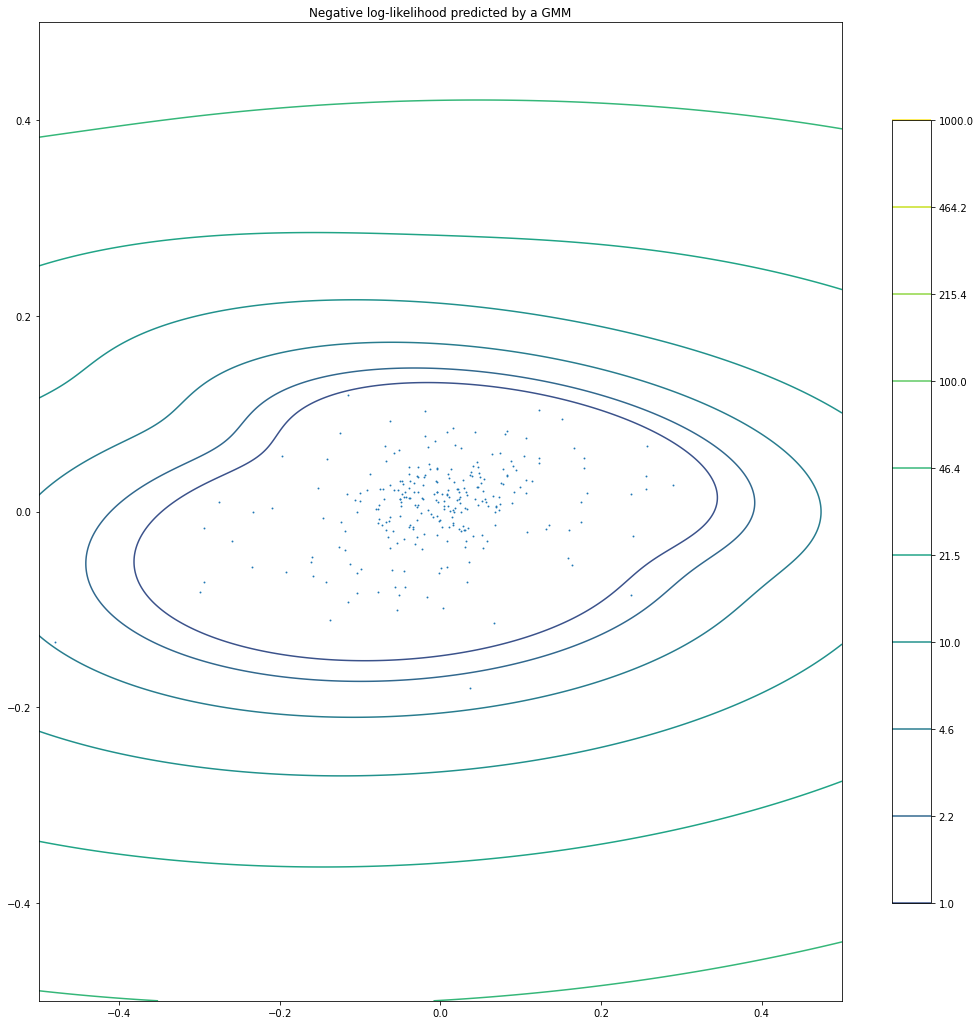

In [14]:
plt.figure(figsize=(18,18))
CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=0.10, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(gmm_data[:, 0], gmm_data[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.savefig("FinalMonthlyGMM.png")
plt.show()
